# Project 3: "La Palma": Anatomy of a sunspot

#### Candidate numbers: ? and ?

What are sunspots? This is a question scientiests still ask, and try to learn more about. 
We want to use spectral observations of the Sun, taken at the Roque de Los Muchachos Observatory with the Swedish 1-m Solar Telescope (SST) at La Palma, in order to learn more about sunspots. Among other things, we want to determine the parameters of the atmosphere, investigate brightness temperature, velocities, and magnetic fields, in order to tell us more about the sunspot, how it compares with the solar granulation around, and its properties. Why are they dark? Are they colder than their surroundings? These are some of the questions we hope to answer after analysing these observations.


Import modules needed in order to analyse the observations:

In [1]:
%%javascript  # Allow equation numbers
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from astropy import units
from astropy import constants
from astropy.table import QTable  # to use tables with units
from astropy.visualization import quantity_support
from IPython.display import set_matplotlib_formats

from astropy.modeling.models import BlackBody
from astropy.modeling.blackbody import blackbody_lambda
from astropy.modeling.blackbody import blackbody_nu

quantity_support()
set_matplotlib_formats('svg')
plt.rc('legend', frameon=False)
#plt.rc('figure', figsize=(10, 8)) # Larger figure sizes

First, we want to find the surface temperature $T_b$ and the velocities, in order to investigate the dynamics of the solar granulation, the granules and the inter-granular lanes, and how they are moving in relation to us. We start by finding $T_b$.
If we look at the frequency related Planck function

\begin{align}
B_{\nu}(T) = \frac{2 h \nu^3}{c^2} \frac{1}{e^{\frac{h \nu}{k_B T} - 1}},
\end{align}

the brightness temperature is the temperature which needs to be implemented into this expression, in order to be able to say

\begin{align}
B_{\nu}(T_b) = I_{\nu}^{\text{obs}},
\end{align}

where $I_{\nu}^{\text{obs}}$ is the observed intensity ..(stemmer det, sant?)?. We assume that the body radiates as a black body, so we can also assume that $I_{\nu} \propto B_{\nu}$, and  that $T_b$ is the same for all frequencies. This means that $T_b$ from continuum frequencies(stemmer?) are more likely to be close to the effective temperature of the star, which indicates that we can use $I_0$ and $\lambda_0$ when calculating $T_b$.


From the observations, we get values for the intensity [W / (Hz m2 sr)], Stokes V (circular polarisation) [W / (Hz m2 sr)] and the wavelength [nm]. There are 13 wavelengths, roughly covering the FeI 617 nm line profile, and we want to use $\lambda_0 = 617.300$ nm.
When looking at Eq.(1) and assuming radiation from a black body, we already know the intensity $I_{\nu}^{\text{obs}}$ from the observations, and we can easy find the frequency $\nu$ values by use of the wavelength values from the observations, so we need to rewrite Eq.(1) in order to find $T_b$. By rewriting, we obtain

\begin{align}
T_b = \Big( \text{ln} \Big( \frac{2h \nu^3}{c^2 I_{\nu}}  +1 \Big) \frac{k}{h \nu} \Big)^{-1}
\end{align}


In order to solve this we first need to read the observations from file. Then, by use of constants collected from $\verb|astropy|$ and Eq.(3) we find the brightness temperature. We then create a plot in order to observe the temperature in the sunspot.


In [42]:
# Define variables:
e = constants.e
c = constants.c
m_e = constants.m_e
k_B = constants.k_B
h = constants.h
g_ = 2.499      #effective Landé factor


# Read observations from data set:
data = QTable.read('SST_sunspot_617_2020.08.07.fits')
Stokes_V = data["stokes_v"]
intensity = data["intensity"]
lam = data["wavelength"]           #observed Doppler-shifted wavelength
lam0 = 617.300 * units.nm          #rest wavelength

#I_lam = I[0]                      #intensiteten ved lambda0   ???



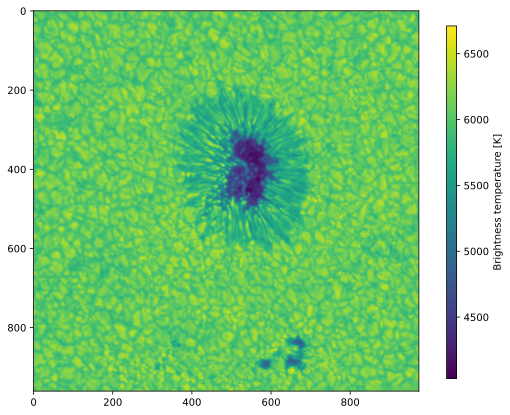

In [43]:
# Brightness temperature:

def T_b(): 
    T_brightness = 1 / (np.log((2*h*((c/lam[0])**3))/(c**2 * intensity[0])/units.sr + 1) * (k_B / (h*(c/lam[0]))))
    return T_brightness.to("K")

#print("Brightness temperature T_b: ",T_b())
fig, ax = plt.subplots(figsize=(7,7))
im1 = ax.imshow(T_b().value, cmap='viridis');
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar_ax.tick_params(labelsize=10)

cbar = fig.colorbar(im1, cax=cbar_ax) #NOE FEIL PÅ DE?
cbar.set_label("Brightness temperature [K]",size=10)
plt.show()


KOMMENTAR PÅ PLOT OG TEMP. HVA SIER DET OSS?

Next, we want to calculate the velocit... forklare hvorfor vi må tenkte på doppler, og bevegelsen osv. og innlede hva vi gjør i koden

FØRST GAUS FITTER VI den spktrallinja. finner FWHM 

In [88]:
#FINNER THETA:


alpha = np.sqrt((248**2) + (473**2)) / (3600*360)*2*np.pi #angle between us and sunspot
y = constants.au * alpha #height of sunspot

theta = np.arcsin(y/constants.R_sun)
cos_theta = np.cos(theta)

print(cos_theta)

0.8306646948578101


In [91]:
#import scipy.integrate as integ
#print()
#integral_1 = np.zeros(data["intensity"][0].shape)
#integral_2 = np.zeros(data["intensity"][0].shape)
#intensity = np.zeros(data["intensity"].shape)
#for i in range(len(data["intensity"])):
#    intensity[i] = data["intensity"][0].value - data["intensity"][i].value
#for i in range(len(data["intensity"][0])):
#    for j in range(len(data["intensity"][0][0])):
#        integral_1[i, j] = integ.trapz(data["wavelength"].value * intensity[:, i, j], data["wavelength"].value)
#        integral_2[i, j] = integ.trapz(intensity[:, i, j], data["wavelength"].value)
#mu = integral_1 / integral_2
#np.save("mu.npy", mu)

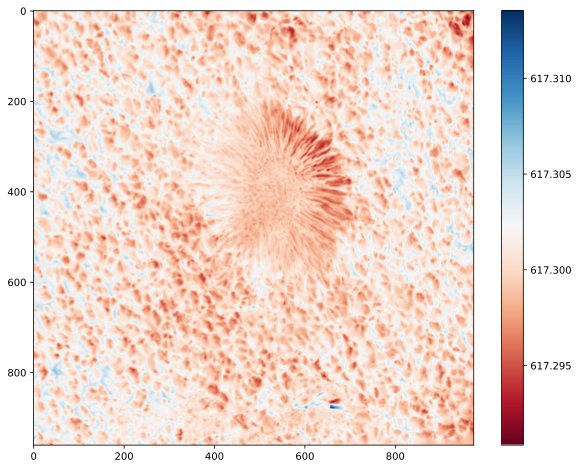

In [98]:
lam_shiftet = np.load("mu.npy")
lam_new =  lam_new * units.nm

fig, ax = plt.subplots(figsize=(10,8))
p = ax.imshow(lam_new, cmap='RdBu');
fig.colorbar(p, ax = ax)


TEKST

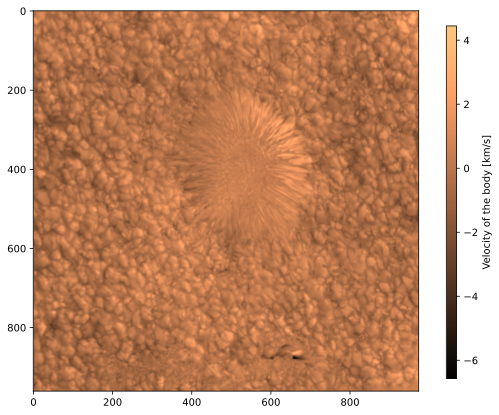

In [114]:
def Doppler_effect(lam0, lam_new):
    v = c * ((lam0 - lam_new)/lam0) #velocity of the body
    return v.to("km/s")

# Plot:
fig, ax = plt.subplots(figsize=(7,7))
im_doppler = ax.imshow(Doppler_effect(lam0, lam_new), cmap='copper');
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar_ax.tick_params(labelsize=10)

cbar = fig.colorbar(im_doppler, cax=cbar_ax)
cbar.set_label("Velocity of the body [km/s]",size=10)
plt.show()


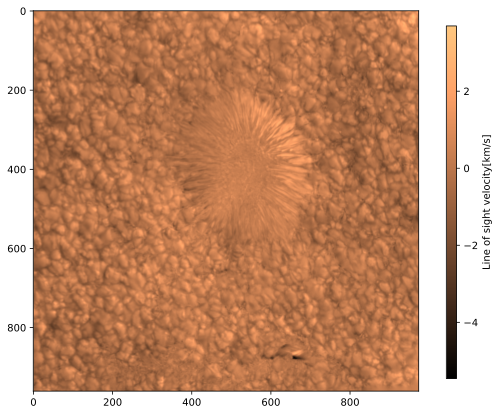

In [116]:
def line_of_sight_vel(v,cos_theta):
    v_los = v*cos_theta
    return v_los


fig, ax = plt.subplots(figsize=(7,7))
im2 = ax.imshow(line_of_sight_vel(Doppler_effect(lam0, lam_new),cos_theta), cmap='copper');
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar_ax.tick_params(labelsize=10)
cbar = fig.colorbar(im2, cax=cbar_ax) #NOE FEIL PÅ DE?
cbar.set_label("Line of sight velocity[km/s]",size=10)
plt.show()


In [6]:
def Zeeman_effect(lam0, B):
    delta_lamb = (e / (4*np.pi*m_e*c)) * lam0**2 * B
    return delta_lamb

def I_inv(I):
    return I[0] - I 

def FWHM():
    #sigma = #?
    return 2*np.sqrt(2*np.log(2*sigma))

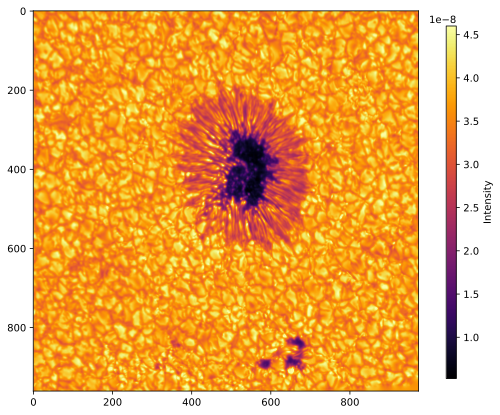

In [39]:
# Plot:
fig, ax = plt.subplots(figsize=(7,7))
im_I = ax.imshow(data['intensity'][0].value, vmax=4.6e-8, cmap='inferno');

cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar_ax.tick_params(labelsize=10)

cbar = fig.colorbar(im_I, cax=cbar_ax)
cbar.set_label("Intensity",size=10)

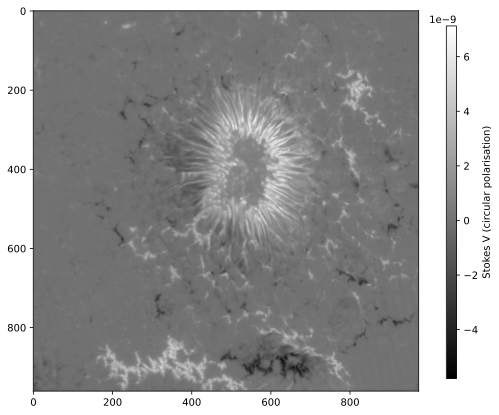

In [41]:
fig, ax = plt.subplots(figsize=(7,7))
im_SV = ax.imshow(data['stokes_v'][4].value,  cmap='gist_gray');
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar_ax.tick_params(labelsize=10)
cbar = fig.colorbar(im_SV, cax=cbar_ax)
cbar.set_label("Stokes V (circular polarisation)",size=10)

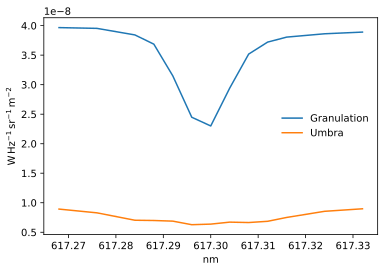

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
wavelength = data['wavelength']
ax.plot(wavelength, data['intensity'][:, 200, 200], label='Granulation')
ax.plot(wavelength, data['intensity'][:, 400, 550], label='Umbra')
ax.legend();





#KLADD::::



$I_{\lambda} = I_0$
#antar at legemet stråler som black body, så derfor kan vi at I_lam = I_0, da er det ikke no dupp. generell forklaring av I_lam

Vi har at I=B, så vi finner brightness temp ved å si at B=I og så henter vi ut bølgelengde og frekvens fra observasjoner og løser for T.
Using spectral velocities and brightness temperatures, what can you tell about the dynamics of the solar granulation? Which is cooler: the granules or the inter-granular lanes? How are they moving in relation to us?